Nama  : Nisa Febrianti<br>
NIM   : 211351103<br>
Kelas : Pagi A

# Import Dataset Kaggle

In [35]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nisafebrianti","key":"27c10f62dab0e69ffc194d0b8e38cd16"}'}

In [36]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [37]:
!kaggle datasets download -d sulmansarwar/transactions-from-a-bakery

transactions-from-a-bakery.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
import zipfile
zip_ref = zipfile.ZipFile('/content/transactions-from-a-bakery.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [40]:
df = pd.read_csv('/content/BreadBasket_DMS.csv')

In [41]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [42]:
df['Date']=pd.to_datetime(df['Date'], format = "%Y-%m-%d")

In [43]:
df['Time'].dtype
df['Date'].dtype

dtype('<M8[ns]')

In [44]:
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.weekday
df['year']=df['Date'].dt.year

In [45]:
df.head()

,Date,Time,Transaction,Item,month,day,year
0,2016-10-30,09:58:11,1,Bread,10,6,2016
1,2016-10-30,10:05:34,2,Scandinavian,10,6,2016
2,2016-10-30,10:05:34,2,Scandinavian,10,6,2016
3,2016-10-30,10:07:57,3,Hot chocolate,10,6,2016
4,2016-10-30,10:07:57,3,Jam,10,6,2016


# EDA

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2017-02-04 00:00:00'),
  Text(1, 0, '2016-11-05 00:00:00'),
  Text(2, 0, '2017-03-04 00:00:00'),
  Text(3, 0, '2017-03-25 00:00:00'),
  Text(4, 0, '2017-01-28 00:00:00'),
  Text(5, 0, '2017-02-18 00:00:00'),
  Text(6, 0, '2016-11-12 00:00:00'),
  Text(7, 0, '2016-11-19 00:00:00'),
  Text(8, 0, '2017-03-11 00:00:00'),
  Text(9, 0, '2017-04-08 00:00:00')])

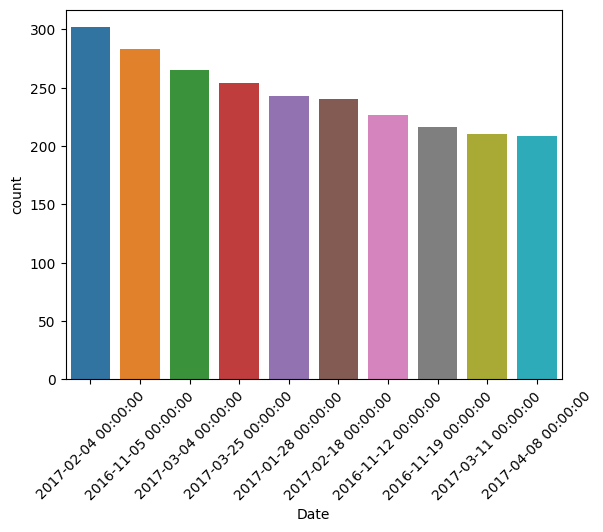

In [46]:
sns.countplot(x = 'Date', data = df, order = df['Date'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak adalah pada tanggal 2017-04-02

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12:07:39'),
  Text(1, 0, '10:45:21'),
  Text(2, 0, '10:55:19'),
  Text(3, 0, '14:38:01'),
  Text(4, 0, '15:09:18'),
  Text(5, 0, '14:35:34'),
  Text(6, 0, '13:43:08'),
  Text(7, 0, '14:19:47'),
  Text(8, 0, '15:26:25'),
  Text(9, 0, '13:44:56'),
  Text(10, 0, '14:14:17'),
  Text(11, 0, '15:46:51'),
  Text(12, 0, '12:45:14'),
  Text(13, 0, '14:08:27'),
  Text(14, 0, '13:08:30'),
  Text(15, 0, '13:14:04'),
  Text(16, 0, '12:58:48'),
  Text(17, 0, '15:35:06'),
  Text(18, 0, '12:07:19'),
  Text(19, 0, '14:18:20'),
  Text(20, 0, '12:16:32'),
  Text(21, 0, '13:41:06'),
  Text(22, 0, '12:49:53'),
  Text(23, 0, '16:09:51'),
  Text(24, 0, '13:19:35')])

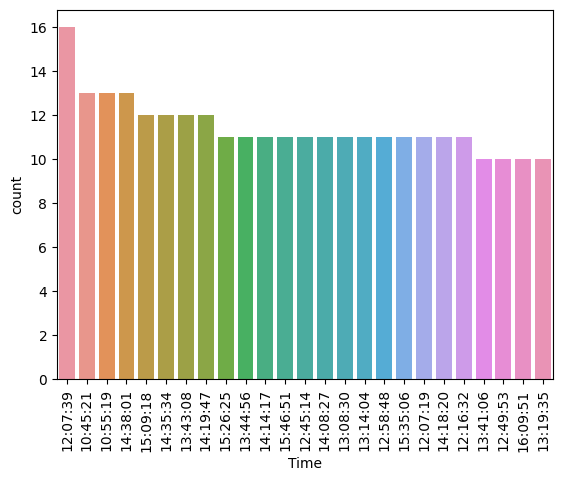

In [47]:
sns.countplot(x = 'Time', data = df, order = df['Time'].value_counts().iloc[:25].index)
plt.xticks(rotation=90)

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak adalah pada jam 12:07:39

<Axes: xlabel='Item', ylabel='count'>

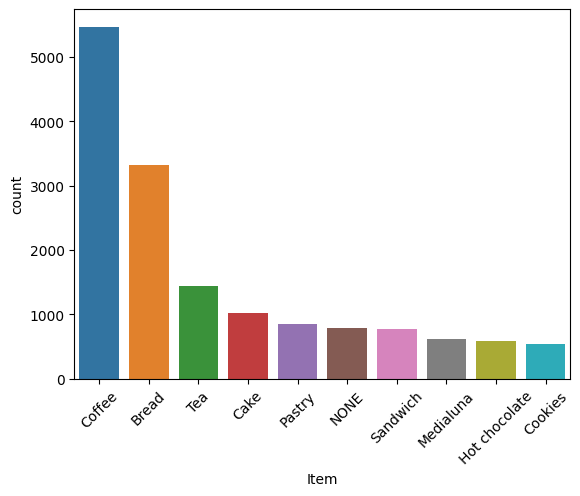

In [48]:
plt.xticks(rotation=45)
sns.countplot(x = 'Item', data = df, order = df['Item'].value_counts().iloc[:10].index)

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak adalah pada item coffee

[Text(0, 0, '1 / 2017'),
 Text(1, 0, '2 / 2017'),
 Text(2, 0, '3 / 2017'),
 Text(3, 0, '4 / 2017'),
 Text(4, 0, '10 / 2016'),
 Text(5, 0, '11 / 2016'),
 Text(6, 0, '12 / 2016')]

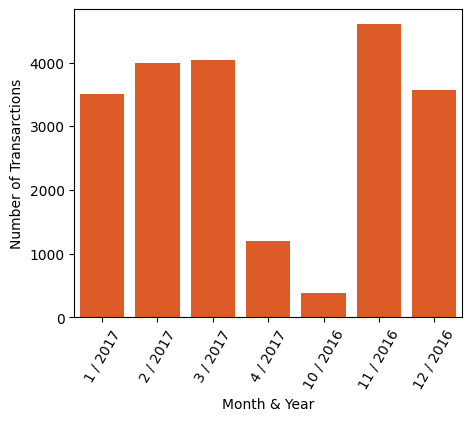

In [49]:
month_year=df.copy()
month_year['Date']=pd.to_datetime(month_year['Date'])
month_year['Month'],month_year['Year']=month_year['Date'].dt.month,month_year['Date'].dt.year

grp_month_year=month_year.groupby(['Month','Year'])['Transaction'].count().reset_index()
grp_month_year['Period'] = grp_month_year.Month.astype(str).str.cat(grp_month_year.Year.astype(str), sep=' / ')

#plot graph for each month of the year 2016,2017
fig,axis=plt.subplots(figsize=(5,4))
axis=sns.barplot(data=grp_month_year,x='Period',y='Transaction',color = ("#FC4E07"))
axis.set_xlabel('Month & Year')
axis.set_ylabel('Number of Transarctions')
axis.set_xticklabels(grp_month_year['Period'], rotation=60)

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak adalah pada tahun 2016

Text(0.5, 1.0, 'Total Transaksi Perhari')

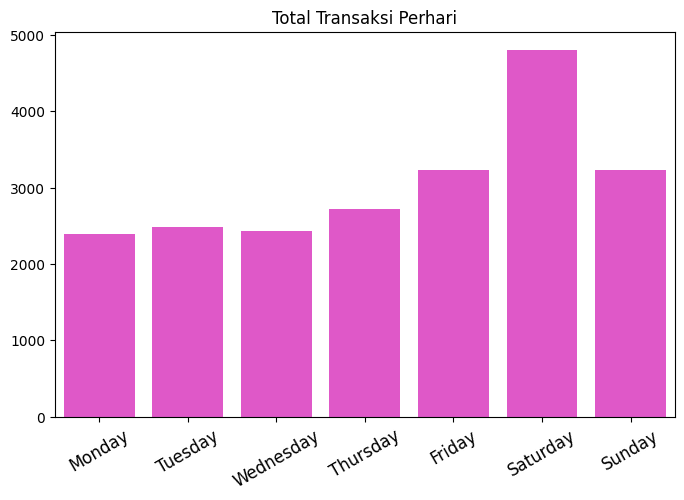

In [50]:
data_perday = df.groupby('day')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    y=data_perday.values, color="#f542d7")
plt.xticks(size = 12, rotation = 30)
plt.title('Total Transaksi Perhari')

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak adalah pada hari sabtu

# Data Preparation

In [51]:
df['Item'] = df['Item'].apply(lambda item: item.lower())
df['Item'] = df['Item'].apply(lambda item: item.strip())

In [52]:
df = df[['Transaction','Item']].copy()
df.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [53]:
from mlxtend.frequent_patterns import association_rules, apriori

In [54]:
item_count = df.groupby(["Transaction","Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [55]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns= 'Item', values = 'Count', aggfunc = 'sum').fillna(0)
print("Ukuran Dataset", item_count_pivot.shape)
item_count_pivot.head(5)

Ukuran Dataset (9531, 95)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
item_count_pivot = item_count_pivot.astype('int32')
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
def encode(x):
  if x <=0:
    return 0
  elif x >= 0:
    return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
print("Ukuran Dataset", item_count_pivot.shape)
print("Jumlah Transaksi", item_count_pivot.shape[0])
print("Jumlah Item", item_count_pivot.shape[1])

Ukuran Dataset (9531, 95)
Jumlah Transaksi 9531
Jumlah Item 95


# Modelling

In [59]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False).head(10)

,support,itemsets
6,0.475081,(coffee)
2,0.324940,(bread)
27,0.141643,(tea)
4,0.103137,(cake)
35,0.089393,"(coffee, bread)"
20,0.085510,(pastry)
19,0.079005,(none)
22,0.071346,(sandwich)
16,0.061379,(medialuna)
12,0.057916,(hot chocolate)


In [60]:
metric ="lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[['antecedents','consequents','support','confidence','lift']]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
33,(toast),(coffee),0.023502,0.704403,1.482699
30,(spanish brunch),(coffee),0.010807,0.598837,1.260494
19,(medialuna),(coffee),0.034939,0.569231,1.198175
24,(pastry),(coffee),0.047214,0.552147,1.162216
1,(alfajores),(coffee),0.019515,0.540698,1.138116
16,(juice),(coffee),0.020460,0.534247,1.124537
22,(none),(coffee),0.042073,0.532537,1.120938
27,(sandwich),(coffee),0.037981,0.532353,1.120551
7,(cake),(coffee),0.054349,0.526958,1.109196
28,(scone),(coffee),0.017941,0.522936,1.100729


# Kesimpulan

Dengan ini kita dapat menarik kesimpulan bahwa toko ini dapat menerapkan diskon atau paket pembelian untuk produk coffee dan toast pada hari Sabtu disekitar jam 12